### Import libraries

In [1]:
import sys
sys.path.append("../")

In [3]:
import os
from os import environ
import numpy as np
from random import choices
import pandas as pd
from tqdm.notebook import tqdm

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from utils.data_augmentation import data_augmentation_selector
from torch.utils.data import DataLoader

In [8]:
from utils.data_augmentation import data_augmentation_selector

In [9]:
import albumentations

## Load Example

In [9]:
img_size, crop_size = 512, 512
train_aug, train_aug_img, val_aug = data_augmentation_selector("none", img_size, crop_size)

Using None Data Augmentation


In [10]:
slide_level, low_res = 2, 512
data_fold=0
normalize = False

dataset = LowResolutionDataset(
    "validation", slide_level, low_res, val_aug, [], normalize=normalize,
    fold=data_fold
)

In [11]:
loader = DataLoader(dataset, batch_size=1, shuffle=False, drop_last=False)

In [12]:
image, mask, original_mask = next(iter(loader))

image = image.data.cpu().numpy().squeeze().transpose(1,2,0)
mask = mask.data.cpu().numpy().squeeze().squeeze()
original_mask = original_mask.data.cpu().numpy().squeeze().squeeze()

print("Image shape: {}".format(image.shape))
print("Mask shape: {}".format(mask.shape))
print("Original Mask shape: {}".format(original_mask.shape))

Image shape: (512, 512, 3)
Mask shape: (512, 512)
Original Mask shape: (3666, 5976)


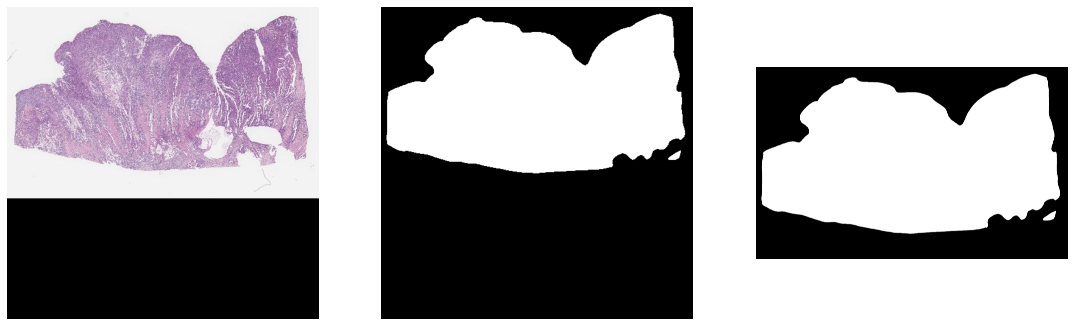

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off')
ax1.imshow(image)
ax2.imshow(mask, cmap="gray")
ax3.imshow(original_mask, cmap="gray")

## Testing Transforms

### Random Crop

In [49]:
cropped = albumentations.Compose([
    albumentations.Resize(650, 650),
    albumentations.RandomCrop(p=1, height=512, width=512),
])
albu_crop = cropped(image=image,mask=mask)
img_cropped = albu_crop["image"] 
mask_cropped = albu_crop["mask"] 

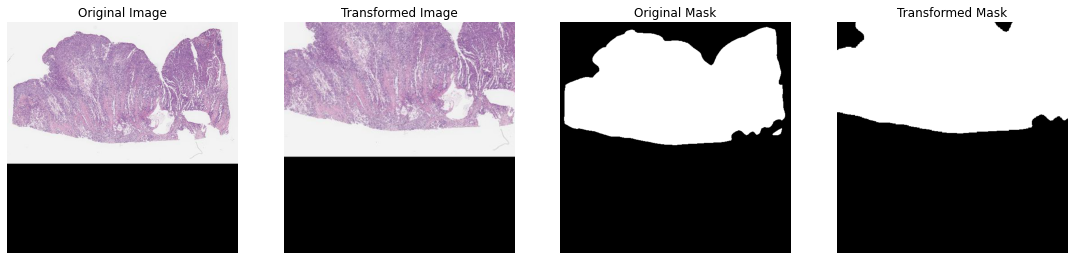

In [50]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_cropped)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_cropped, cmap="gray")

### Rotation

In [52]:
rotate = albumentations.Rotate(p=1, limit=45, interpolation=1, border_mode=0)
albu_rotated = rotate(image=image,mask=mask)
img_rotated = albu_rotated["image"] 
mask_rotated = albu_rotated["mask"] 

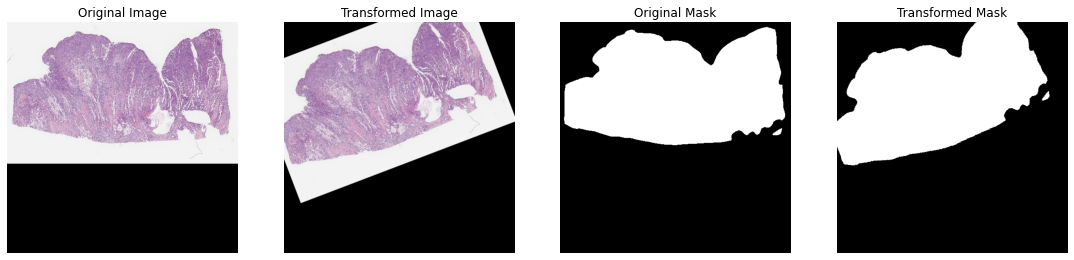

In [53]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_rotated)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_rotated, cmap="gray")

### Vertical Flip

In [55]:
vflip = albumentations.VerticalFlip(p=1)
albu_vflip = vflip(image=image,mask=mask)
img_vflip = albu_vflip["image"] 
mask_vflip = albu_vflip["mask"] 

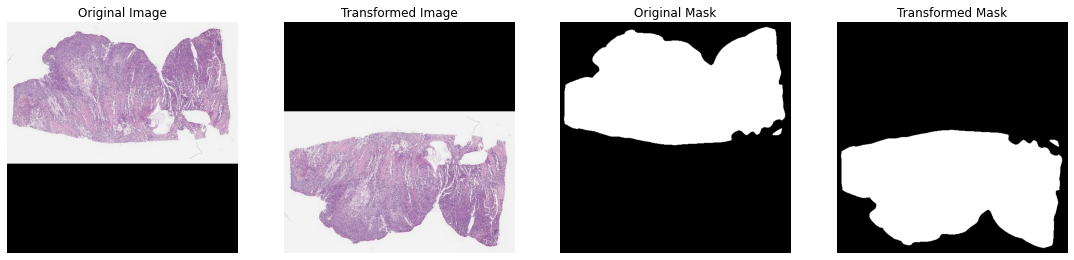

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_vflip)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_vflip, cmap="gray")

### Horizontal Flip

In [57]:
hflip = albumentations.HorizontalFlip(p=1)
albu_hflip = hflip(image=image,mask=mask)
img_hflip = albu_hflip["image"] 
mask_hflip = albu_hflip["mask"] 

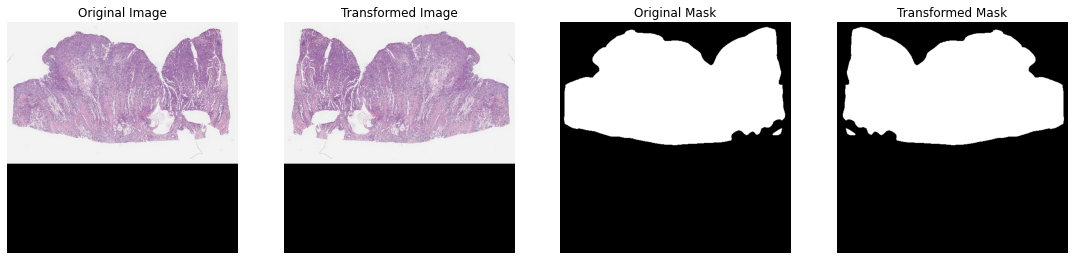

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_hflip)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_hflip, cmap="gray")

### Elastic Transform

In [82]:
elastic = albumentations.ElasticTransform(p=1, alpha=333, sigma=333 * 0.05, alpha_affine=333 * 0.1)
albu_elastic = elastic(image=image,mask=mask)
img_elastic = albu_elastic["image"] 
mask_elastic = albu_elastic["mask"] 

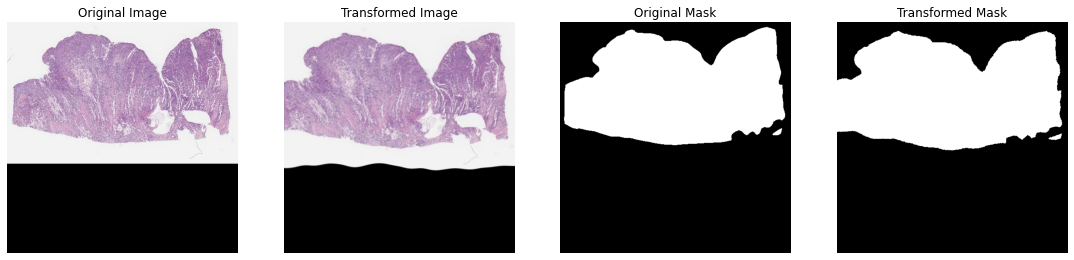

In [83]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_elastic)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_elastic, cmap="gray")

### Grid Distortion

In [98]:
grid_d = albumentations.GridDistortion(p=1, distort_limit=.5)
albu_gridd = grid_d(image=image,mask=mask)
img_gridd = albu_gridd["image"] 
mask_gridd = albu_gridd["mask"] 

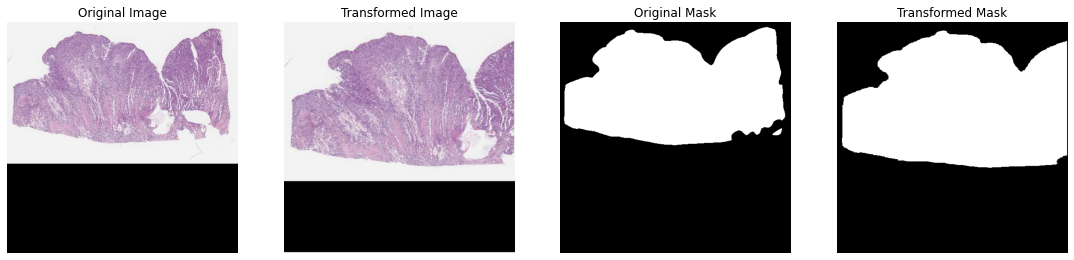

In [99]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_gridd)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_gridd, cmap="gray")

### Shift

In [100]:
shift = albumentations.ShiftScaleRotate(p=1, shift_limit=0.2, scale_limit=0.0, rotate_limit=0)
albu_shift = shift(image=image,mask=mask)
img_shift = albu_shift["image"] 
mask_shift = albu_shift["mask"] 

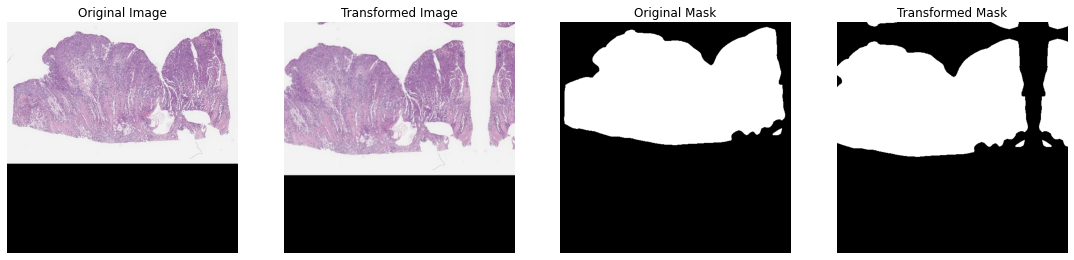

In [101]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_shift)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_shift, cmap="gray")

### Scale

In [102]:
scale = albumentations.ShiftScaleRotate(p=1, shift_limit=0.0, scale_limit=0.2, rotate_limit=0)
albu_scale = scale(image=image,mask=mask)
img_scale = albu_scale["image"] 
mask_scale = albu_scale["mask"] 

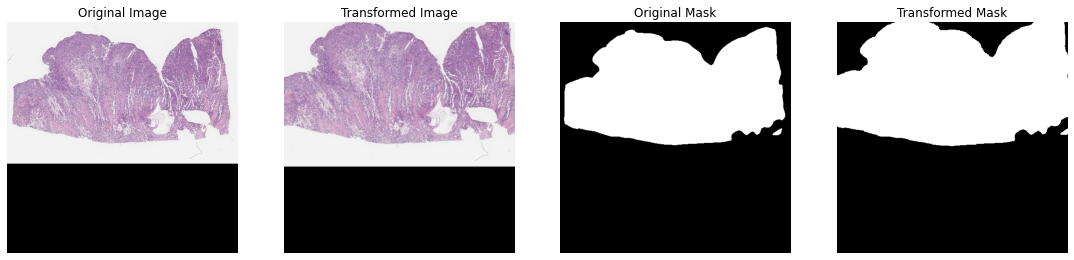

In [103]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_scale)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_scale, cmap="gray")

### Optical Distortion

In [116]:
optical_d = albumentations.OpticalDistortion(p=1, distort_limit=0.7, shift_limit=0.22)
albu_opticald = optical_d(image=image,mask=mask)
img_opticald = albu_opticald["image"] 
mask_opticald = albu_opticald["mask"] 

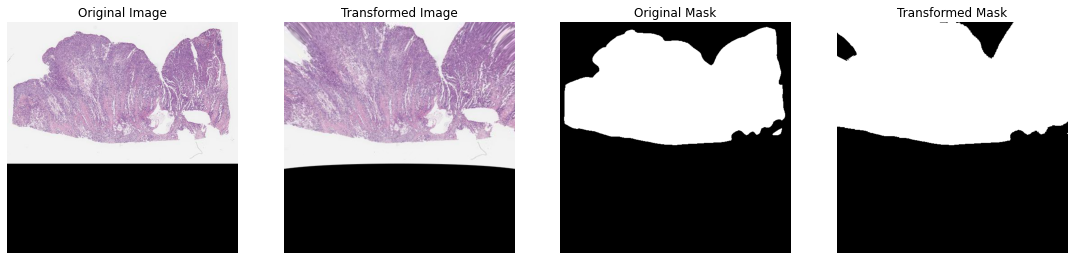

In [117]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_opticald)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_opticald, cmap="gray")

# Solo IMG Transfom

### Coarse Dropout (Cutout)

In [167]:
cutout = albumentations.CoarseDropout(p=1, max_holes=3, max_height=30, max_width=30)
albu_cutout = cutout(image=image,mask=mask)
img_cutout = albu_cutout["image"] 
mask_cutout = albu_cutout["mask"] 

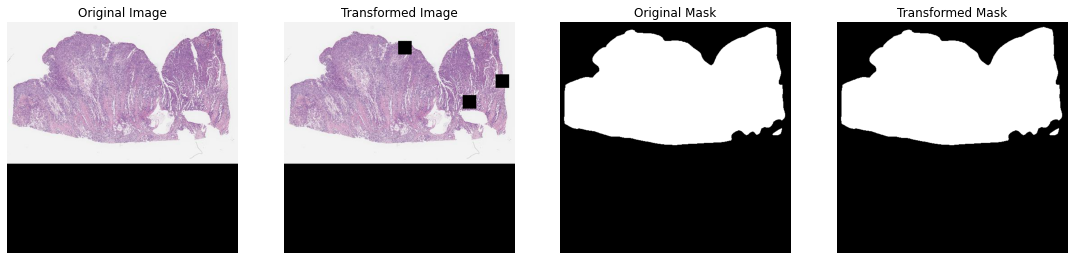

In [168]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 19))
ax1.axis('off'); ax2.axis('off'); ax3.axis('off'); ax4.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_cutout)
ax3.title.set_text("Original Mask")
ax3.imshow(mask, cmap="gray")
ax4.title.set_text("Transformed Mask")
ax4.imshow(mask_cutout, cmap="gray")

### Downscale

In [156]:
tarns = albumentations.Downscale(p=1, scale_min=0.4, scale_max=0.8, interpolation=0)
albu = tarns(image=image)
img_albu = albu["image"]  

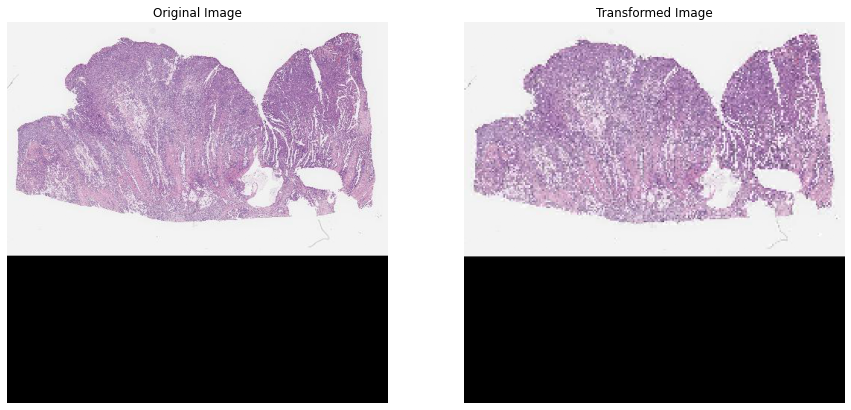

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.axis('off'); ax2.axis('off')
ax1.title.set_text("Original Image")
ax1.imshow(image)
ax2.title.set_text("Transformed Image")
ax2.imshow(img_albu)